## **TP2** 

## Import BIB

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [2]:
def load_data(chemin):
   try:
      data = pd.read_csv(chemin , sep=',' )
      return data
   except Exception as e:
      print(f"Une erreur s'est produite : {e}")

In [3]:
chemin_data = '..//DATA//DatasetExos.csv'
data = load_data(chemin_data)
# suppression des Nan

In [4]:
data.head(10)

,ep (ms),Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,ID,Exercise,Category,Set
0,2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30.0
1,2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30.0
2,2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30.0
3,2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30.0
4,2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30.0
5,2019-01-11 15:08:06.200,-0.026000,0.965000,-0.118000,0.4634,5.2194,-6.4636,B,bench,heavy,30.0
6,2019-01-11 15:08:06.400,-0.048667,0.790000,-0.145333,21.6950,8.1708,-28.2196,B,bench,heavy,30.0
7,2019-01-11 15:08:06.600,-0.170000,0.899500,-0.250000,17.5246,1.5976,-17.5854,B,bench,heavy,30.0
8,2019-01-11 15:08:06.800,-0.222667,0.907000,-0.204333,-7.2318,-1.3536,-0.4026,B,bench,heavy,30.0
9,2019-01-11 15:08:07.000,-0.204500,0.930000,-0.149000,-28.6830,-10.2076,20.5732,B,bench,heavy,30.0


In [5]:
data = data[data['Acc_x'].notna()]
data = data[data['Acc_y'].notna()]
data = data[data['Acc_z'].notna()]
data = data[data['Gyro_x'].notna()]
data = data[data['Gyro_y'].notna()]
data = data[data['Gyro_z'].notna()]
data = data[data['Set'].notna()]



In [6]:

# Fonction pour détecter les outliers par la méthode de l’IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Colonnes à analyser pour les outliers
colonnes_cibles = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyro_x', 'Gyro_y', 'Gyro_z']

# Appliquer la détection d'outliers seulement sur les colonnes cibles
outliers = data[colonnes_cibles].apply(detect_outliers_iqr)

# Identifier les lignes contenant au moins un outlier
outlier_indices = outliers.any(axis=1)

# Supprimer les lignes avec au moins un outlier
data_sans_outliers = data[~outlier_indices]

print(data_sans_outliers)


                      ep (ms)     Acc_x     Acc_y     Acc_z  Gyro_x  Gyro_y  \
0     2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392   
1     2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904   
2     2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560   
3     2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244   
4     2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486   
...                       ...       ...       ...       ...     ...     ...   
9004  2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218   
9005  2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854   
9006  2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342   
9007  2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562   
9008  2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240   

      Gyro_z ID Exercise Category   Set  
0     0.9

## Scatter Plot

In [7]:
def generate_ScatterPlot(data , att1 , att2):
    # print(data.shape)
    title = f'Scatter plot de {att2} en fonction de {att1}.'
    plt.scatter(data[att1],data[att2], color='red')
    plt.title(title , fontsize=13)
    plt.xlabel(att1)
    plt.ylabel(att2)
    plt.show()

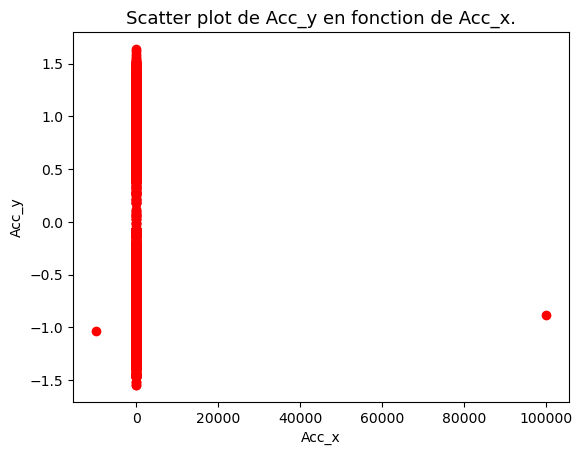

In [8]:
generate_ScatterPlot(data ,'Acc_x' , 'Acc_y')

In [9]:
# filtred_data = data[(data['Acc_x'] <= 2000) & (data['Acc_x'] >= -1000)]
# generate_ScatterPlot(filtred_data ,'Acc_x' , 'Acc_y')

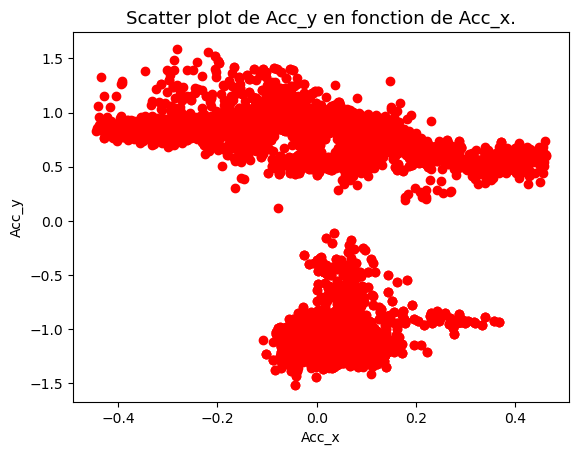

In [10]:
generate_ScatterPlot(data_sans_outliers ,'Acc_x' , 'Acc_y')

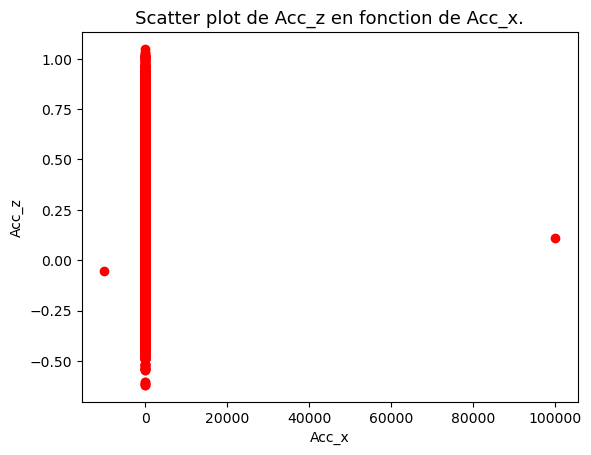

In [11]:
generate_ScatterPlot(data ,'Acc_x' , 'Acc_z')

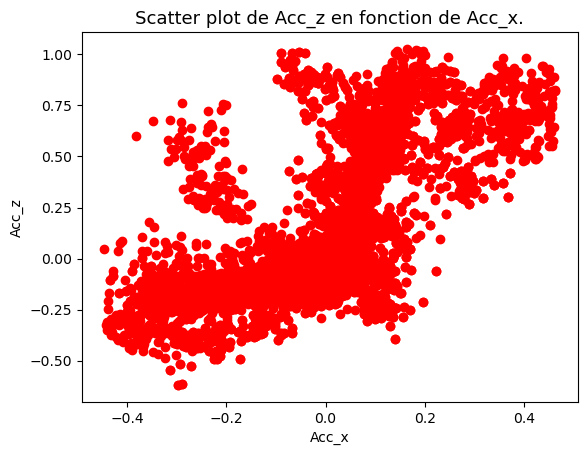

In [12]:
generate_ScatterPlot(data_sans_outliers ,'Acc_x' , 'Acc_z')


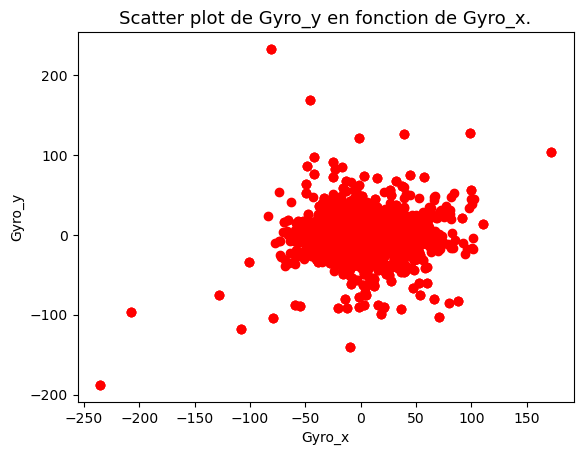

In [13]:
generate_ScatterPlot(data ,'Gyro_x' , 'Gyro_y')


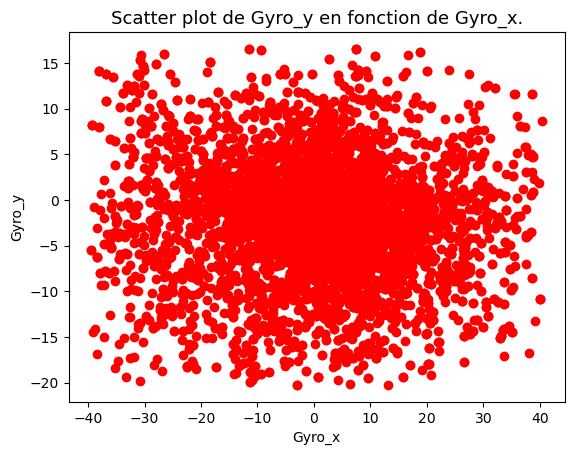

In [14]:
generate_ScatterPlot(data_sans_outliers ,'Gyro_x' , 'Gyro_y')

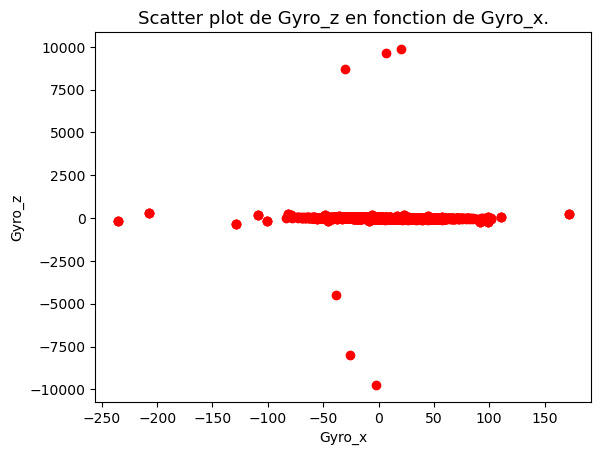

In [15]:
generate_ScatterPlot(data ,'Gyro_x' , 'Gyro_z')

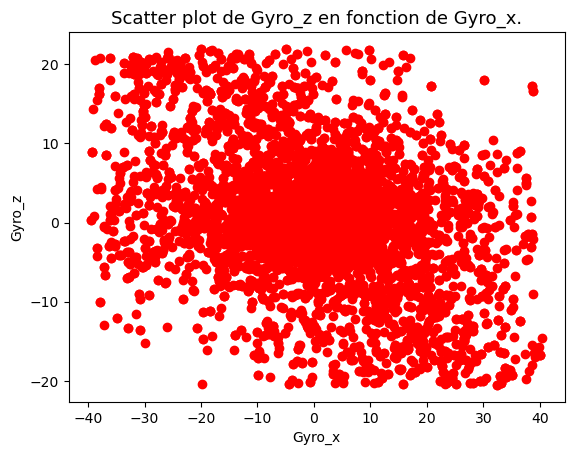

In [16]:
generate_ScatterPlot(data_sans_outliers ,'Gyro_x' , 'Gyro_z')


## Histogram

In [17]:
def generate_histogram(df, att):
    
    plt.hist(df[att], bins=10, color='red', edgecolor='black', alpha=0.7)
    
    plt.title("Histogram", fontsize=14)
    plt.xlabel(att, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    
    plt.show()

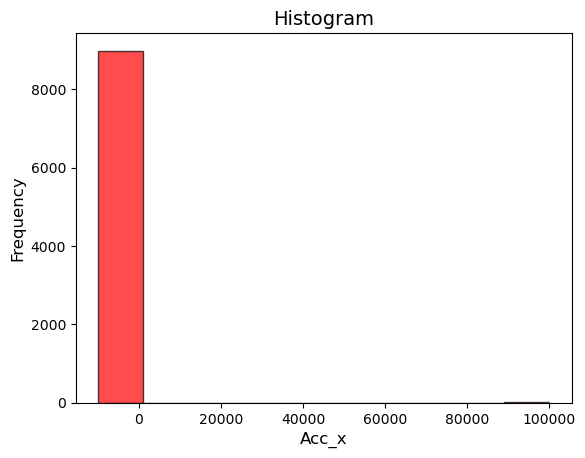

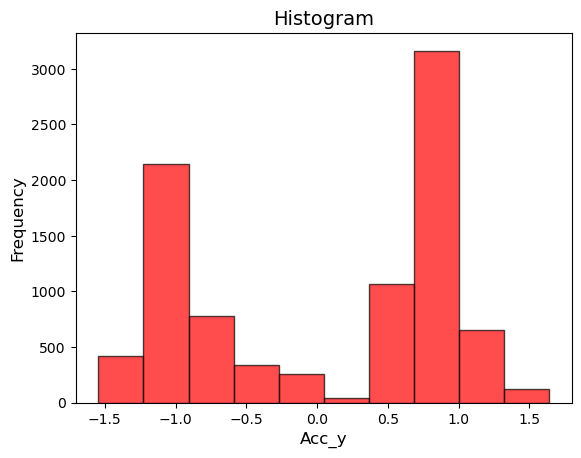

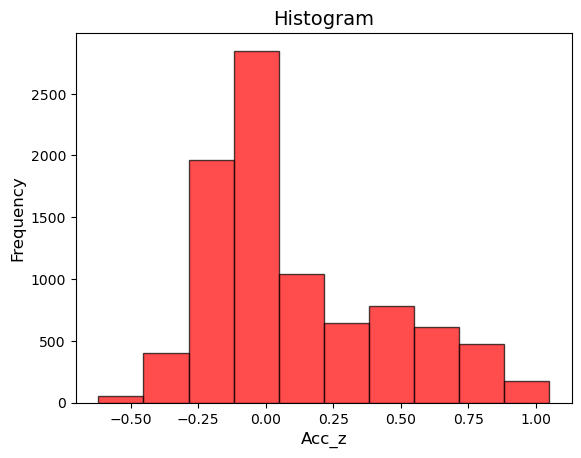

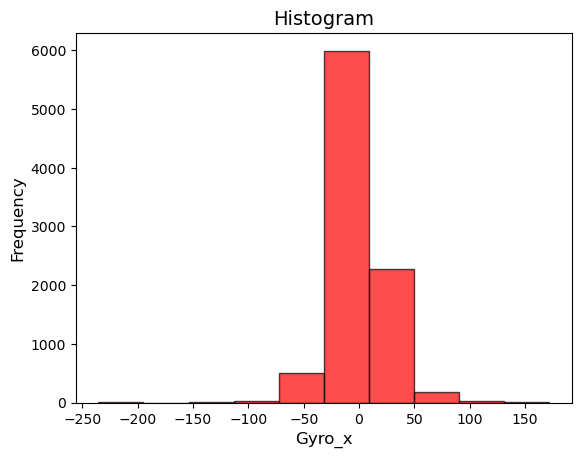

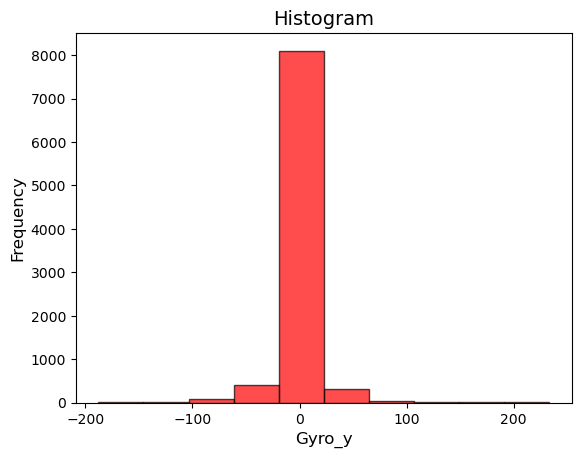

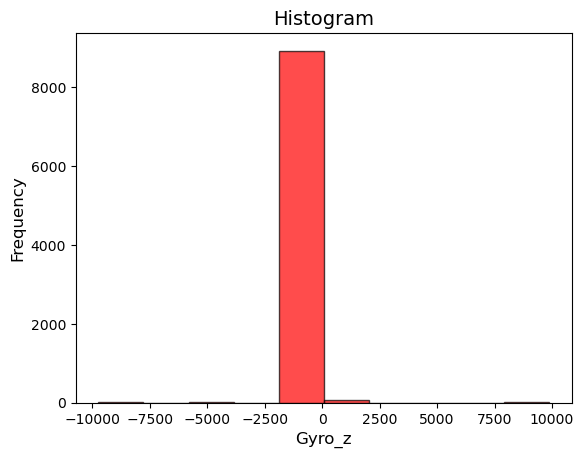

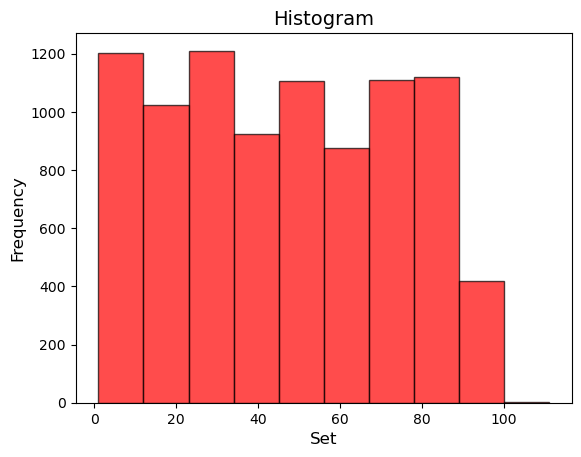

In [18]:
generate_histogram(data, "Acc_x")
generate_histogram(data, "Acc_y")
generate_histogram(data, "Acc_z")

generate_histogram(data, "Gyro_x")
generate_histogram(data, "Gyro_y")
generate_histogram(data, "Gyro_z")

generate_histogram(data, "Set")

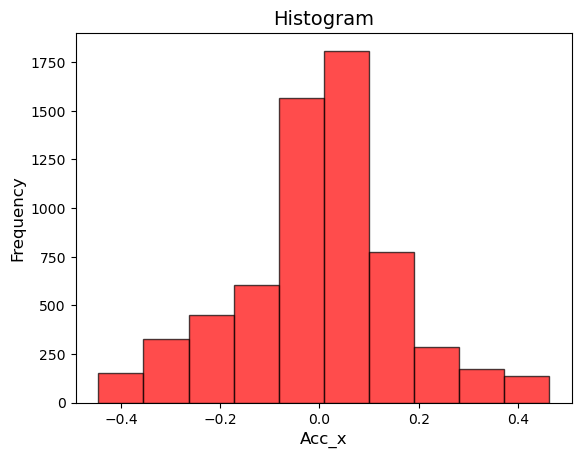

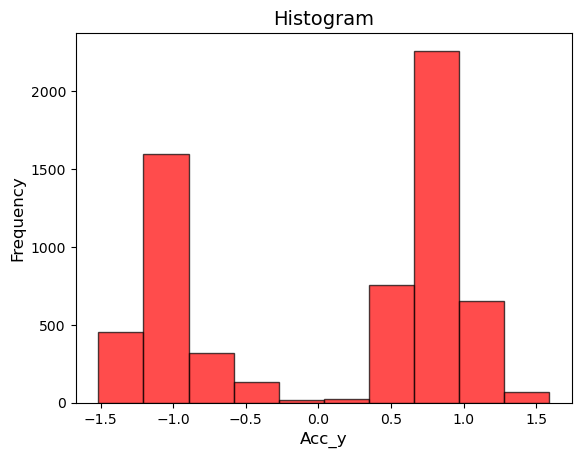

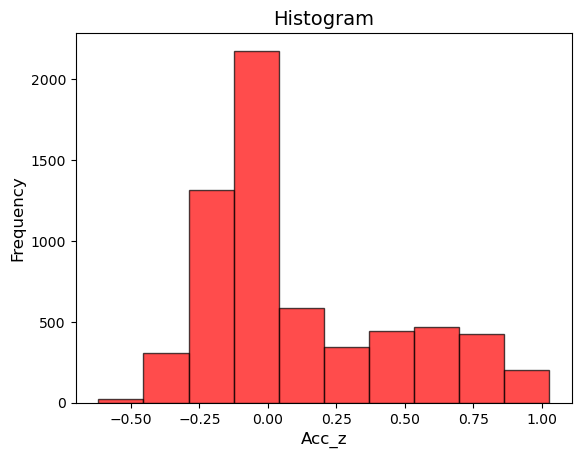

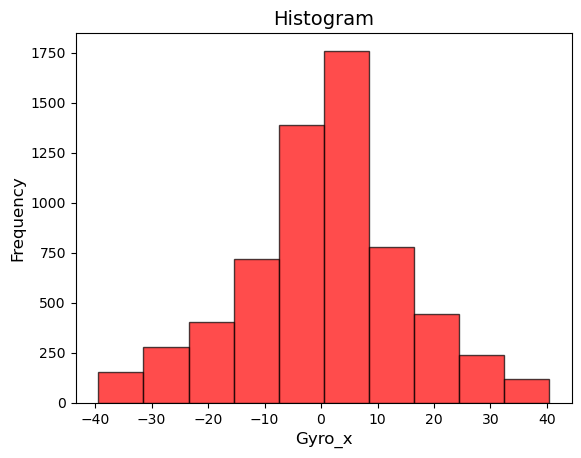

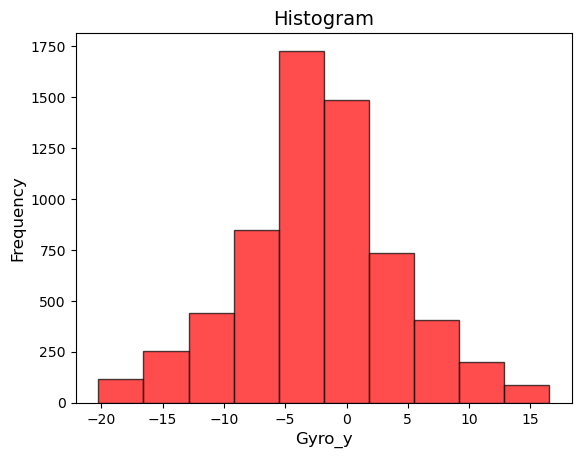

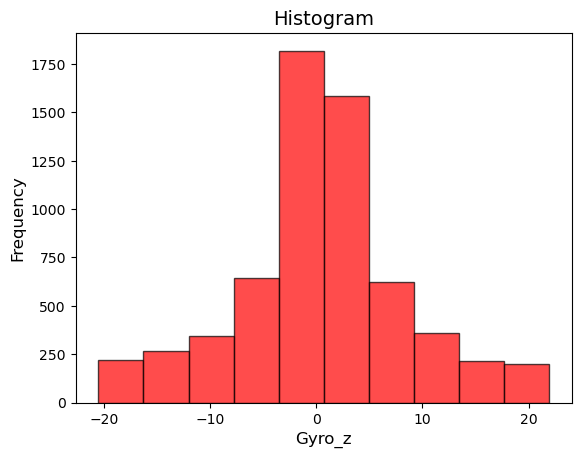

In [19]:
generate_histogram(data_sans_outliers, "Acc_x")
generate_histogram(data_sans_outliers, "Acc_y")
generate_histogram(data_sans_outliers, "Acc_z")

generate_histogram(data_sans_outliers, "Gyro_x")
generate_histogram(data_sans_outliers, "Gyro_y")
generate_histogram(data_sans_outliers, "Gyro_z")

## Bar Chart

In [20]:
def generate_bar_chart(df, att):
    #Generates a bar chart for a categorical attribute from a DataFrame.
    #     
    counts = df[att].value_counts()
    
    plt.bar(counts.index, counts.values, color='red', edgecolor='black', alpha=0.7)
    
    plt.title("Bar Chart", fontsize=14)
    plt.xlabel(att, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    
    # Rotate the x-axis labels if needed (for better readability)
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.show()


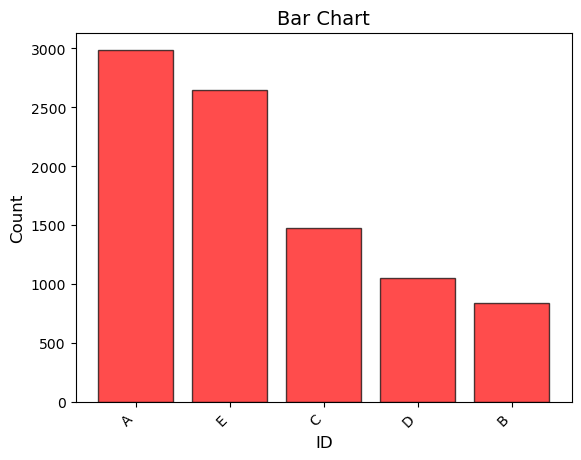

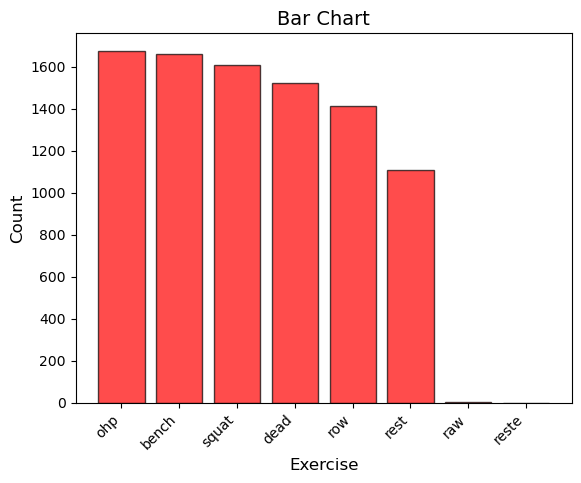

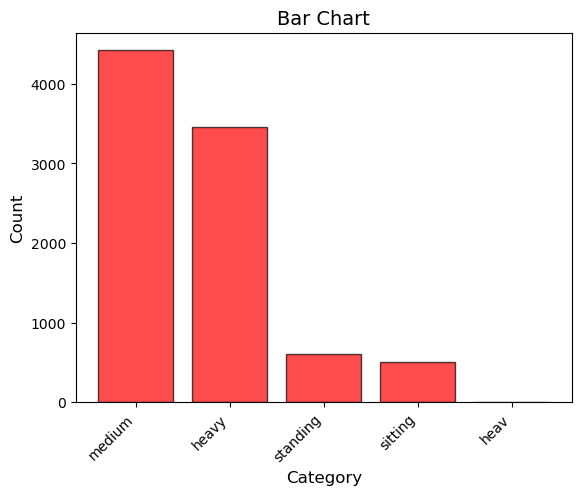

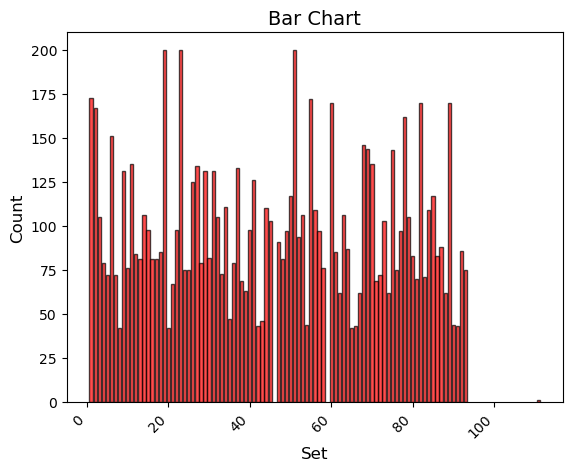

In [21]:
generate_bar_chart(data, "ID")
generate_bar_chart(data, "Exercise")
generate_bar_chart(data, "Category")
generate_bar_chart(data, "Set")

## Box plot

In [22]:
def generate_box_plots(df, attributes, show_outliers=True):

    plt.boxplot([df[attribute] for attribute in attributes],
                vert=True, #Orientation of the box plot = vertical (False is horizental)
                patch_artist=True, # Enables filling the box with color.
                showfliers=show_outliers,
                boxprops=dict(facecolor='gray', color='black'), 
                medianprops=dict(color='red'), 
                whiskerprops=dict(color='black'),
                capprops=dict(color='yellow'))
    
    # Add title and labels
    plt.title("Box Plots", fontsize=14)
    plt.ylabel("Values", fontsize=12)
    plt.xticks(range(1, len(attributes) + 1), attributes, rotation=45, ha='right')  # Set x-ticks to column names
    
    # Show the plot
    plt.show()

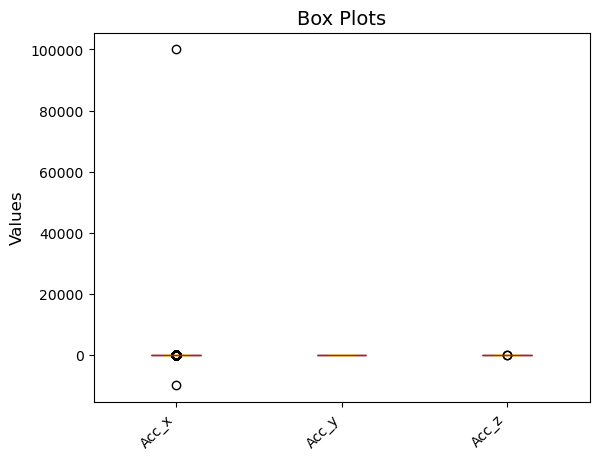

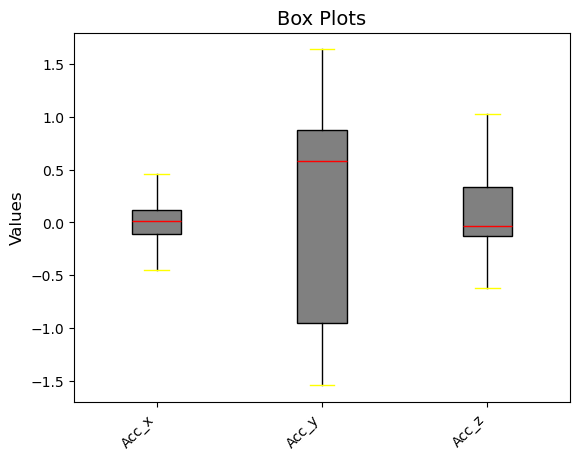

In [23]:
generate_box_plots(data, ['Acc_x', 'Acc_y', 'Acc_z'], show_outliers=True)
generate_box_plots(data, ['Acc_x', 'Acc_y', 'Acc_z'], show_outliers=False)

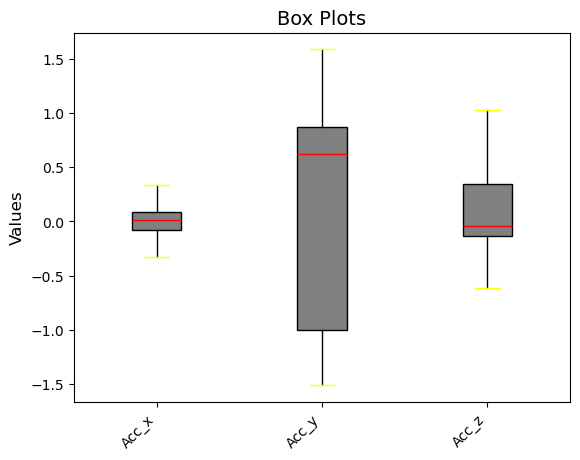

In [25]:
# generate_box_plots(data_sans_outliers, ['Acc_x', 'Acc_y', 'Acc_z'], show_outliers=True)
generate_box_plots(data_sans_outliers, ['Acc_x', 'Acc_y', 'Acc_z'], show_outliers=False)